# KUIS 2 Pembelajaran Mesin


NAMA : Revangga Adytya

Kelas : TI 3A

Absen : 26

## Tentang dataset

Pada sebuah lembaga kemanusiaan berbasis teknologi informasi, dibentuk beberapa tim kemanusiaan yang bertugas untuk terjun ke masyarakat memberikan bantuan dalam bentuk aplikasi komputer atau layanan pelatihan IT.  Kegiatn tersebut dilaksanakan setiap tahun dengan ketentuan anggota organisasi tersebut dapat bergabung ke beberapa tim sebagai ketua atau anggota. Terdapat pula anggota yang sudah tidak aktif di organisasi tersebut (terhapus di database mereka —> label N/A).  Organisasi tersebut juga melakukan rekrutmen volunteer, namun tidak semua tim menggunakan bantuan volunteer. Hasil kegiatan dari setiap tim dapat diwujudkan ke dalam sebuah pengakuan hak cipta atau publikasi karya ilmiah atau publikasi berita di media massa.

## Ketentuan
1. Pengerjaan secara individu alias setiap mahasiswa!
2. Terdapat data dengan nilai #N/A, pertimbangkan cara terbaik untuk mengatasi nilai tersebut.
3. Tidak boleh ada duplikasi pekerjaan antar mahasiswa
4. Berikan penjelasan untuk setiap tahapan. Jangan hanya kode!

## Soal
1. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (10 poin)
2. Tentukan data validasi! (10 poin)
3. Tentukan secara tepat kolom yang menjadi "label" (20 poin)
4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
5. Lakukan tunning hyperparameter berdasarkan hasil klasifikasi pada nomor 3 menggunakan metode Grid Search dan Random Search! Simpulkan parameter apa yang paling baik digunakan berdasarkan metode klasifikasi yang dipilih, dan berapa akurasinya. (40 poin)

In [1]:
# import library
import pandas as pd
import numpy as np

In [2]:
# Membaca dan Cek Data
df = pd.read_csv('dataset_quiz.csv')

df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [3]:
# Cek data yang kosong
df.isna().sum()

id_ketua               3
id_anggota1            5
id_anggota2            4
id_anggota3            3
id_anggota4           13
id_anggota5           84
keterlibatan_vltr      0
jml_vltr_terlibat      0
tahun                  0
skema                  0
luaran_hki             0
jenis_luaran_hki       0
potensi_hki            0
luaran_lain            0
jenis_luaran_lain      0
status_luaran_lain     0
dtype: int64

In [4]:
# Menghilangkan data null
df.drop('id_anggota5', axis=1, inplace=True)

modus_ketua = df['id_ketua'].mode()[0]
df['id_ketua'] = df['id_ketua'].fillna(modus_ketua)

modus_anggota1 = df['id_anggota1'].mode()[0]
df['id_anggota1'] = df['id_anggota1'].fillna(modus_anggota1)

modus_anggota2 = df['id_anggota2'].mode()[0]
df['id_anggota2'] = df['id_anggota2'].fillna(modus_anggota2)

modus_anggota3 = df['id_anggota3'].mode()[0]
df['id_anggota3'] = df['id_anggota3'].fillna(modus_anggota3)

modus_anggota4 = df['id_anggota4'].mode()[0]
df['id_anggota4'] = df['id_anggota4'].fillna(modus_anggota4)
# Cek Data
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [5]:
# Cek data yang kosong
df.isna().sum()

id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
id_anggota4           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

TUGAS NO.1
1. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut!

<AxesSubplot:title={'center':'Jenis\xa0Iuaran\xa0Lain'}, ylabel='jenis_luaran_lain'>

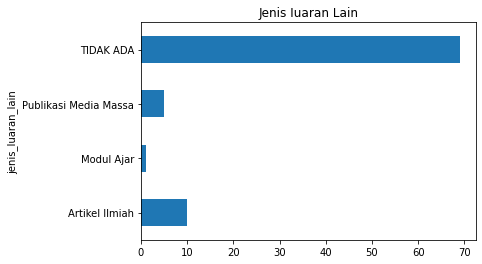

In [6]:
# Bar Chart Horizontal
df.groupby(['jenis_luaran_lain']).size().plot(
    kind='barh', title='Jenis Iuaran Lain')

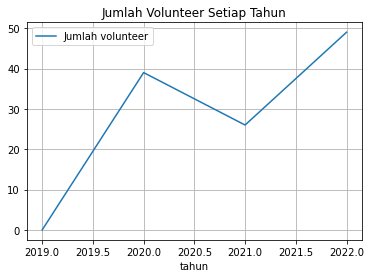

In [7]:
# Line Chart
from matplotlib import pyplot as plt


df.groupby(['tahun']).sum().plot(
    kind='line', y='jml_vltr_terlibat', title='Jumlah Volunteer Setiap Tahun', grid=True)

plt.legend(['Jumlah volunteer'])

<AxesSubplot:ylabel='id_ketua'>

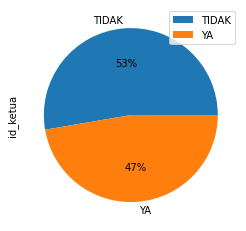

In [8]:
# Pie Chart
# Persentase keterlibatan volunteer pada tim
colors = ['pink', 'steelblue']

df.groupby(['keterlibatan_vltr']).sum().plot(
    kind='pie', y='id_ketua', autopct='%1.0f%%')

<AxesSubplot:title={'center':'Status\xa0Luaran\xa0Lain'}, xlabel='status_luaran_lain'>

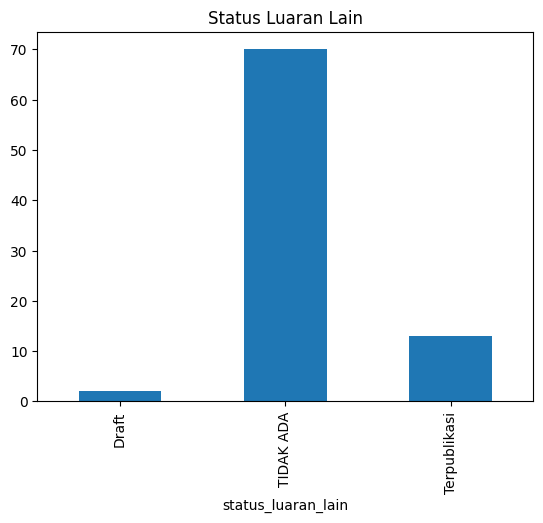

In [9]:
# Bar Chart Vertikal
df.groupby(['status_luaran_lain']).size().plot(
    kind='bar', title='Status Luaran Lain')

Text(0, 0.5, 'Jumlah Luaran Hasil Kegiatan')

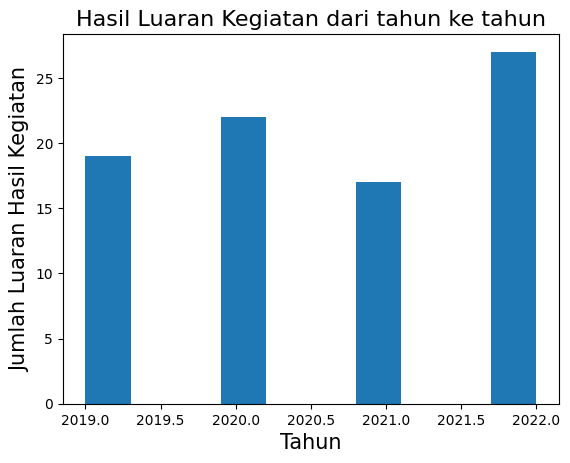

In [10]:
# Histogram
plt.hist(df['tahun'])
plt.title('Hasil Luaran Kegiatan dari tahun ke tahun', size=16)
plt.xlabel('Tahun', size=15)
plt.ylabel('Jumlah Luaran Hasil Kegiatan', size=15)

### Tugas No. 2 & 3
Tentukan data validasi 

Tentukan secara tepat kolom yang menjadi "label" 

In [11]:
#Encode label pada beberapa kolom

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['keterlibatan_vltr'] = encode.fit_transform(df['keterlibatan_vltr'])
df['skema'] = encode.fit_transform(df['skema'])
df['luaran_hki'] = encode.fit_transform(df['luaran_hki'])
df['jenis_luaran_hki'] = encode.fit_transform(df['jenis_luaran_hki'])
df['potensi_hki'] = encode.fit_transform(df['potensi_hki'])
df['luaran_lain'] = encode.fit_transform(df['luaran_lain'])
df['jenis_luaran_lain'] = encode.fit_transform(df['jenis_luaran_lain'])
df['status_luaran_lain'] = encode.fit_transform(df['status_luaran_lain'])
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0,0,2019,1,1,1,2,0,3,1
1,7214.0,7109.0,8402.0,7903.0,9202.0,0,0,2019,1,1,1,2,0,3,1
2,5911.0,8201.0,8701.0,9101.0,9003.0,0,0,2019,1,1,1,2,0,3,1
3,8402.0,7702.0,8602.0,8903.0,8903.0,0,0,2019,1,1,1,2,0,3,1
4,8201.0,8305.0,5911.0,5903.0,8402.0,0,0,2019,1,1,1,2,0,3,1


In [12]:
#selesksi fitur
X = df.iloc[:,7:-1]
y = df['keterlibatan_vltr']

X.shape

(85, 7)

In [22]:
#training dan validasi data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_val, X_unseen, y_val, y_unseen = train_test_split(X_test, y_test, test_size=0.5, random_state=10)

### Tugas No. 4
Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! 

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Sesuaikan dt ke set training
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

# Menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.59
Test set accuracy: 0.5882352941176471


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Sesuaikan rf ke set training
rf = RandomForestClassifier(n_estimators=20, random_state=5)
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

# Menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.59
Test set accuracy: 0.5882352941176471


### Tugas No.5
Lakukan tunning hyperparameter berdasarkan hasil klasifikasi pada nomor 3 menggunakan metode Grid Search dan Random Search! Simpulkan parameter apa yang paling baik digunakan berdasarkan metode klasifikasi yang dipilih, dan berapa akurasinya

In [26]:
#selesksi fitur
A= df[['jml_vltr_terlibat']]
b = df['luaran_hki']

#training data
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=3)

In [27]:
from sklearn.tree import DecisionTreeRegressor

#inissiasi DT
dt = DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=3)
dt.fit(A_train,b_train)

#fit ke dalam training set
DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=3)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [47]:
from sklearn.metrics import mean_squared_error

#compute b_pred
b_pred = dt.predict(A_test)

#compute mse_dt
mse_dt = mean_squared_error(b_test,b_pred)

#compute rmse_dt
rmse_dt = mse_dt ** (1/2)

#Print rmse_dt
print("Hasil MSE : {:.2f}".format(rmse_dt))

Hasil MSE : 0.29
